In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [2]:
gdf = aup.gdf_from_db('job_access', 'mind_the_gap')
print(gdf.shape)
gdf.head(4)

(1187, 15)


,hex_id_8,pobtot_x,pea_x,geometry,denue_count,denue_jobs,denue_0_5,denue_6_10,denue_11_30,denue_31_50,denue_51_100,denue_101_250,denue_250_mas,pobtot_y,pea_y
0,8849abc9ebfffff,273.168550,131.056180,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",112.520000,753.480000,96.760000,7.600000,4.560000,1.680000,0.920000,1.000000,0.000000,273.168550,131.056180
1,8849abc9e3fffff,98.333336,42.333332,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",40.000000,309.812500,34.062500,2.437500,1.625000,1.000000,0.375000,0.500000,0.000000,98.333336,42.333332
2,8849abc999fffff,60.000000,27.000000,"POLYGON ((-103.64928 20.44809, -103.65381 20.4...",259.444444,1134.407407,246.000000,8.740741,3.111111,0.888889,0.000000,0.000000,0.703704,60.000000,27.000000
3,8849abc9e7fffff,1247.971700,577.124270,"POLYGON ((-103.59961 20.43722, -103.60414 20.4...",456.111111,2407.555556,402.333333,28.888889,16.527778,6.250000,0.722222,0.777778,0.611111,1247.971700,577.124270


In [3]:
gdf['log_denue_jobs'] = np.log(gdf['denue_jobs'])

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


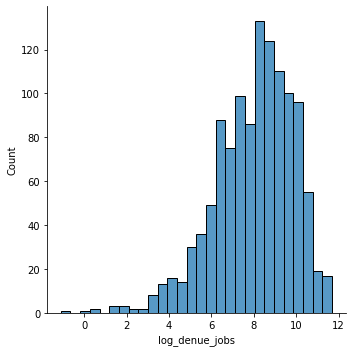

In [4]:
sns.displot(gdf['log_denue_jobs'])

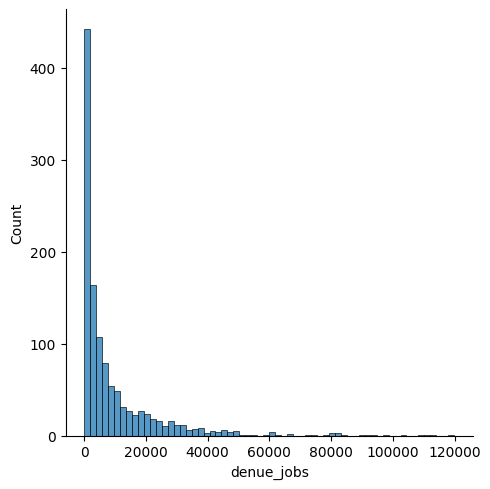

In [5]:
sns.displot(gdf['denue_jobs'])

In [6]:
gdf['log_denue_count'] = np.log(gdf['denue_count'])

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


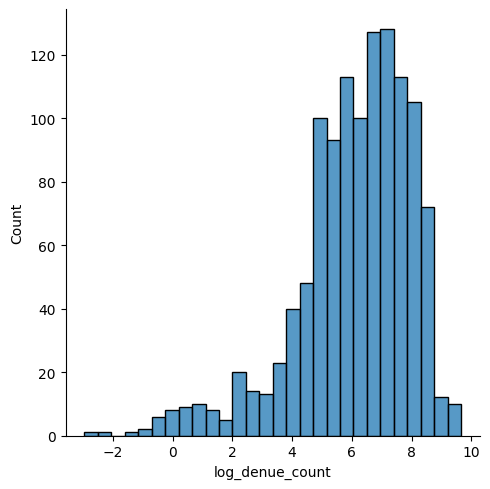

In [7]:
sns.displot(gdf['log_denue_count'])

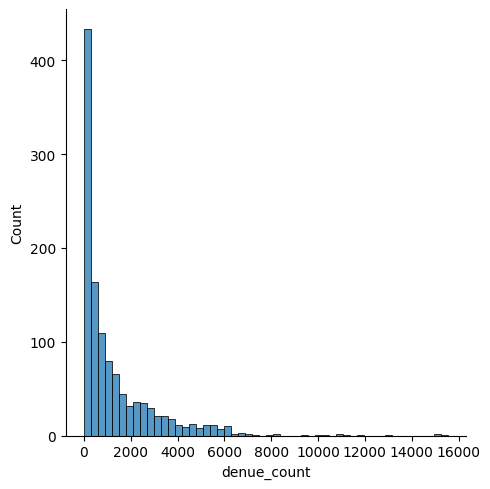

In [8]:
sns.displot(gdf['denue_count'])

In [9]:
gdf.log_denue_count = gdf.log_denue_count.replace([np.inf, -np.inf], np.nan) 
gdf.log_denue_jobs = gdf.log_denue_jobs.replace([np.inf, -np.inf], np.nan) 

<AxesSubplot:>

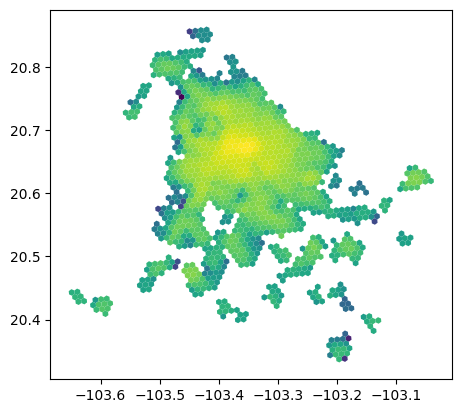

In [10]:
gdf.plot('log_denue_jobs')

<AxesSubplot:>

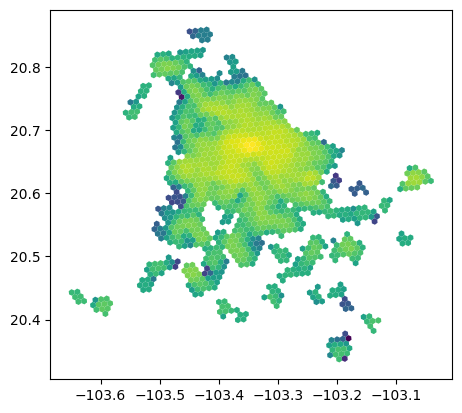

In [11]:
gdf.plot('log_denue_count')

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

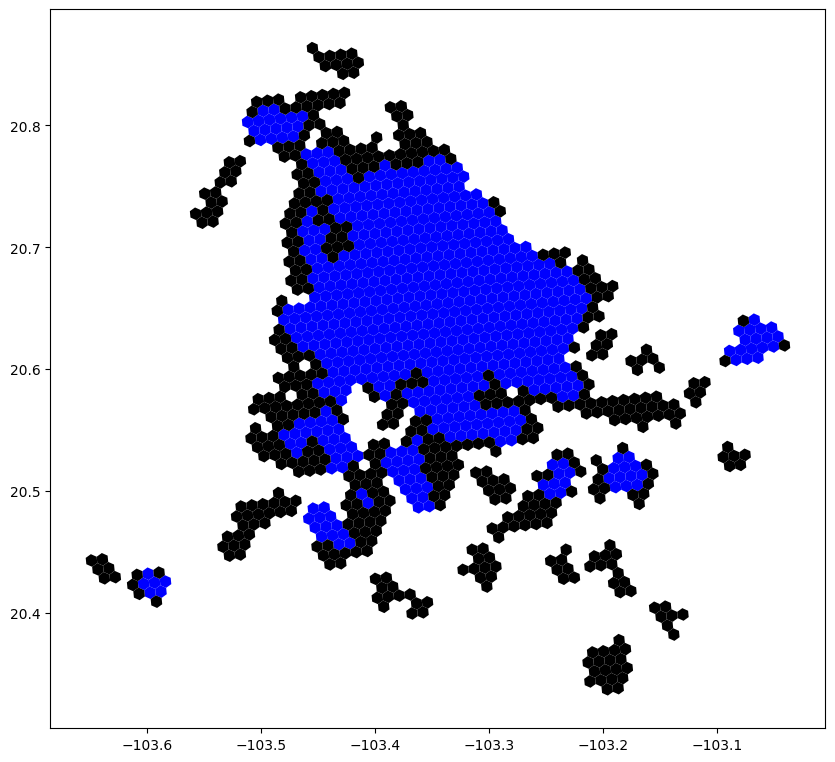

In [12]:
fig,ax = plt.subplots(figsize=(10,10))

idx = gdf.log_denue_count >= gdf.log_denue_count.mean()

gdf.loc[idx].plot('log_denue_count', color='blue', zorder=1, ax=ax)

gdf.loc[~idx].plot('log_denue_count', color='black', zorder=2, ax=ax)


In [13]:
hex_job_access = gpd.read_file('../../data/processed/mind_the_gap/hex_job_access_v2.geojson')
print(hex_job_access.shape)
hex_job_access.head(4)

(1187, 20)


,hex_id_8,pobtot_x,pea_x,denue_count,denue_jobs,denue_0_5,denue_6_10,denue_11_30,denue_31_50,denue_51_100,denue_101_250,denue_250_mas,pobtot_y,pea_y,job_pea,job-pea,tasa_empleo,empleo_informal,tasa_empleo_informal,geometry
0,8849abc9ebfffff,273.168550,131.056180,112.520000,753.480000,96.760000,7.600000,4.560000,1.680000,0.920000,1.000000,0.000000,273.168550,131.056180,5.749,622.424,0.617012,-39.063108,-0.298064,"POLYGON ((-103.61319 20.42802, -103.61772 20.4..."
1,8849abc9e3fffff,98.333336,42.333332,40.000000,309.812500,34.062500,2.437500,1.625000,1.000000,0.375000,0.500000,0.000000,98.333336,42.333332,7.318,267.479,0.622549,-4.690396,-0.110797,"POLYGON ((-103.61374 20.43321, -103.61319 20.4..."
2,8849abc999fffff,60.000000,27.000000,259.444444,1134.407407,246.000000,8.740741,3.111111,0.888889,0.000000,0.000000,0.703704,60.000000,27.000000,42.015,1107.407,0.562500,-10.600000,-0.392593,"POLYGON ((-103.64928 20.44809, -103.65381 20.4..."
3,8849abc9e7fffff,1247.971700,577.124270,456.111111,2407.555556,402.333333,28.888889,16.527778,6.250000,0.722222,0.777778,0.611111,1247.971700,577.124270,4.172,1830.431,0.586327,-188.793477,-0.327128,"POLYGON ((-103.59961 20.43722, -103.60414 20.4..."


In [14]:
gdf = gdf.merge(hex_job_access[['hex_id_8','tasa_empleo','empleo_informal','tasa_empleo_informal']], on='hex_id_8')

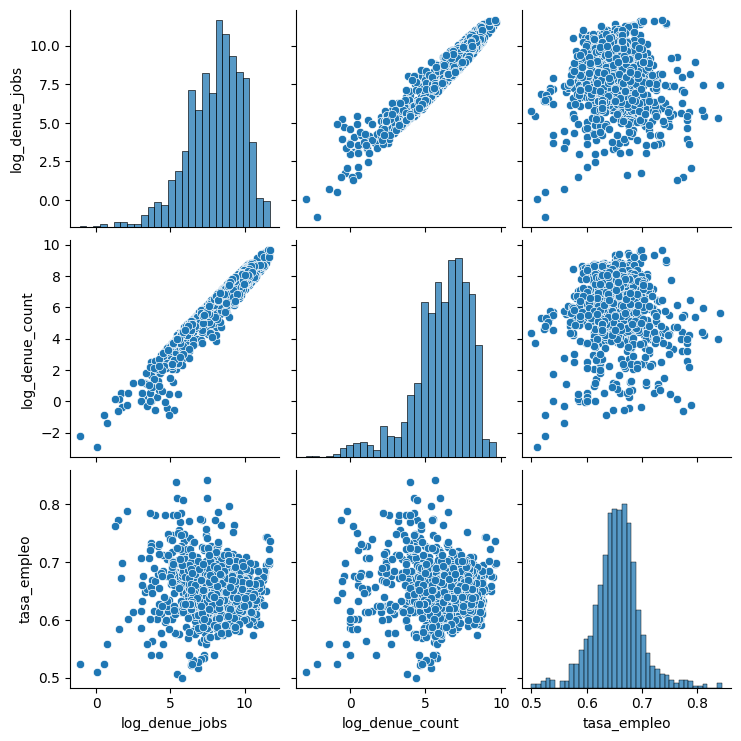

In [15]:
sns.pairplot(gdf[['log_denue_jobs','log_denue_count','tasa_empleo']])

In [16]:
gdf['log_0_5'] = np.log(gdf['denue_0_5'])
gdf['log_6_10'] = np.log(gdf['denue_6_10'])
gdf['log_11_30'] = np.log(gdf['denue_11_30'])

gdf.log_0_5 = gdf.log_0_5.replace([np.inf, -np.inf], np.nan) 
gdf.log_6_10 = gdf.log_6_10.replace([np.inf, -np.inf], np.nan)
gdf.log_11_30 = gdf.log_11_30.replace([np.inf, -np.inf], np.nan) 

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

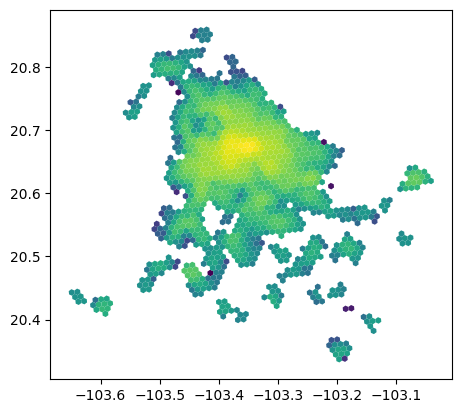

In [17]:
gdf.plot('log_6_10')

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

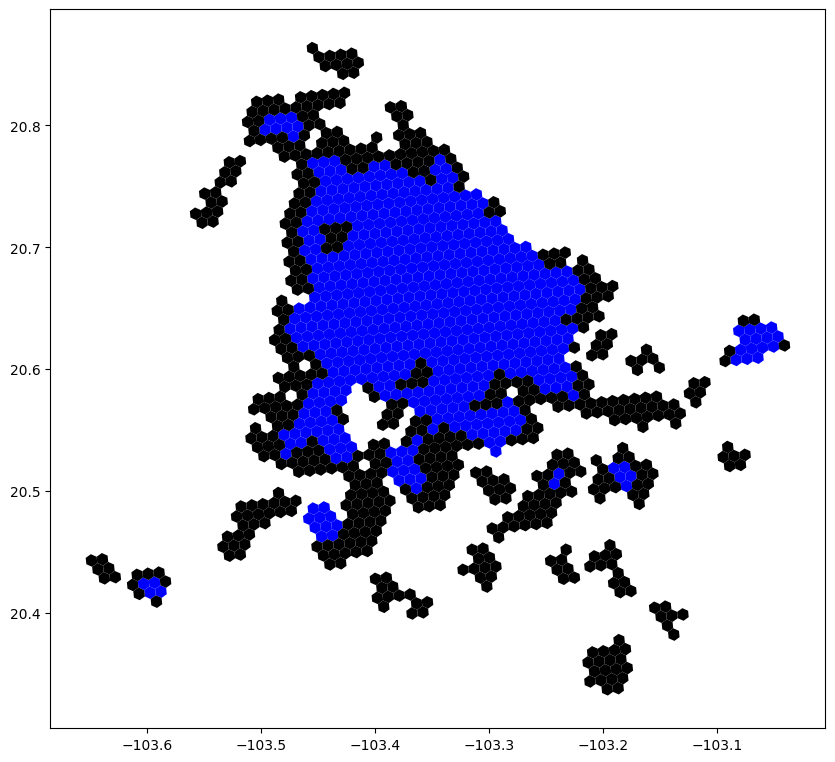

In [18]:
fig,ax = plt.subplots(figsize=(10,10))

idx = gdf.log_6_10 >= gdf.log_6_10.mean()

gdf.loc[idx].plot('log_6_10', color='blue', zorder=1, ax=ax)

gdf.loc[~idx].plot('log_6_10', color='black', zorder=2, ax=ax)

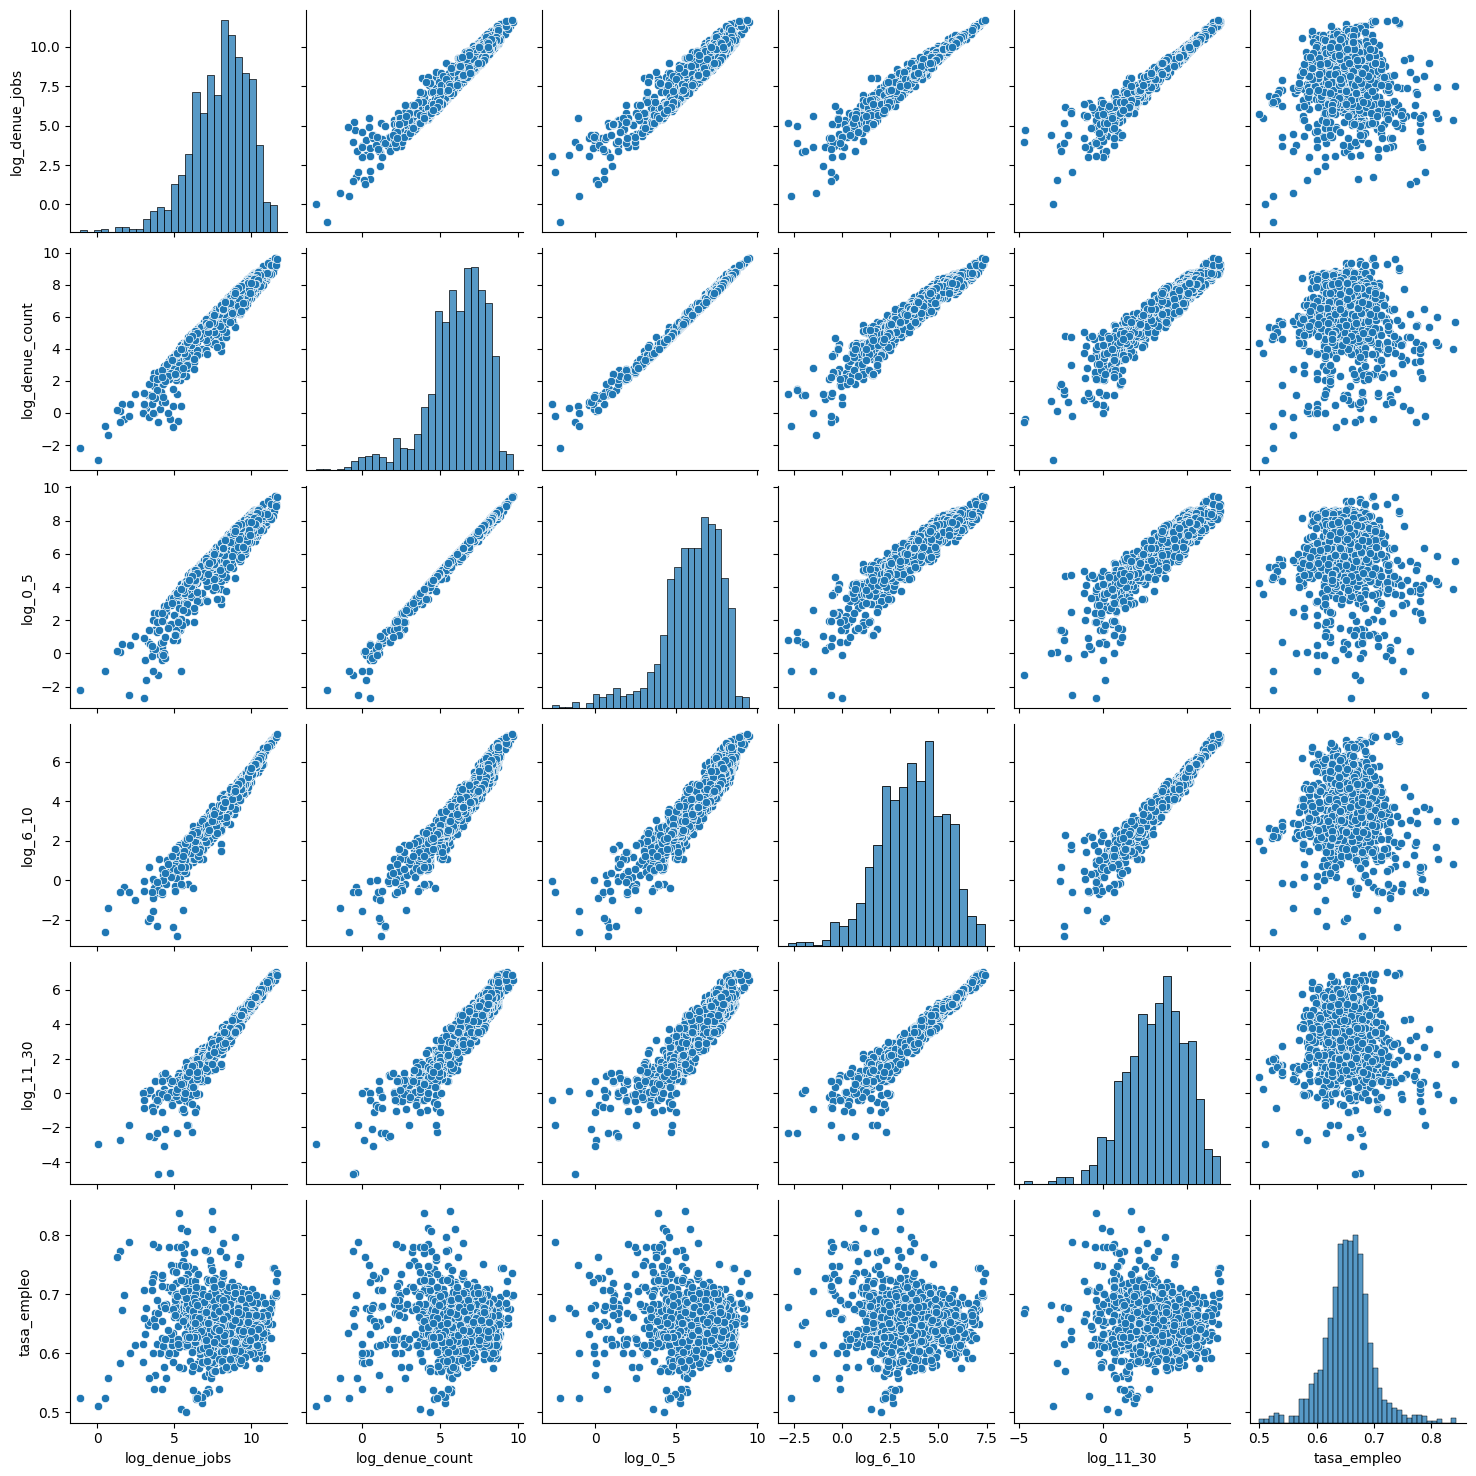

In [19]:
sns.pairplot(gdf[['log_denue_jobs','log_denue_count',
                  'log_0_5','log_6_10','log_11_30',
                  'tasa_empleo']])

## Oferta de empleo mayor de 0 a 5

In [20]:
gdf['denue_jobs_>_0_5'] = gdf['denue_jobs'] - gdf['denue_0_5'] * 3
gdf['pct_jobs_>_0_5'] = gdf['denue_jobs_>_0_5'] / gdf['denue_jobs']

<AxesSubplot:>

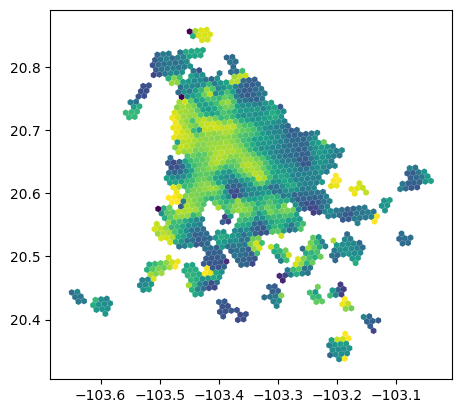

In [21]:
gdf.plot('pct_jobs_>_0_5')

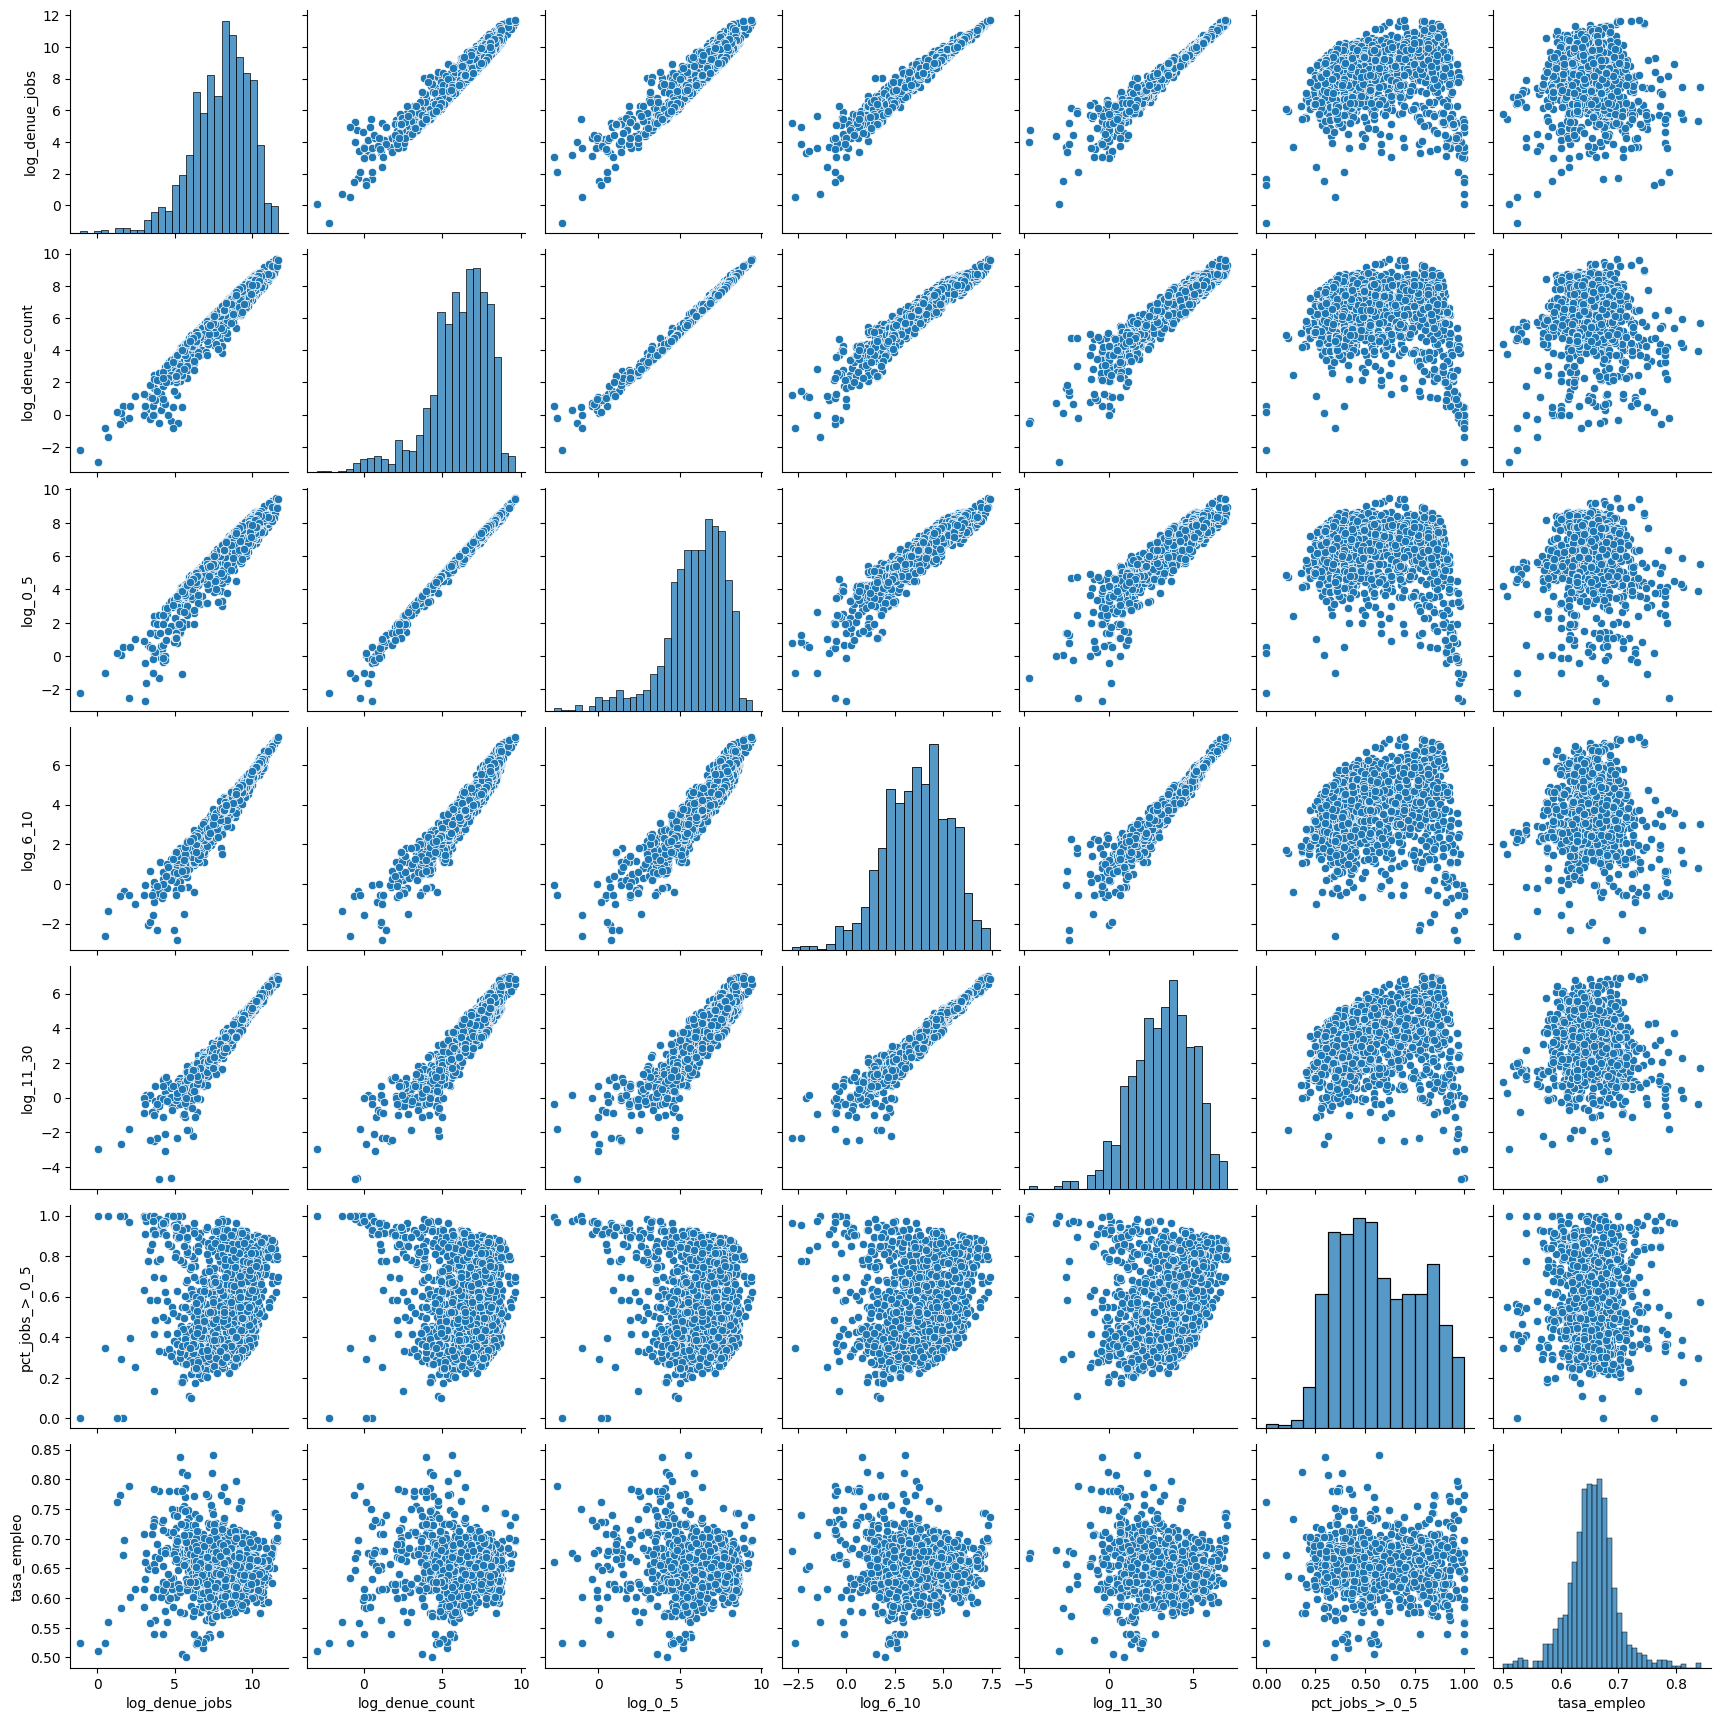

In [22]:
sns.pairplot(gdf[['log_denue_jobs','log_denue_count',
                  'log_0_5','log_6_10','log_11_30',
                  'pct_jobs_>_0_5','tasa_empleo']])

In [23]:
gdf['denue_jobs_>_11'] = gdf['denue_jobs'] - gdf['denue_0_5'] * 3 - gdf['denue_6_10'] * 8
gdf['pct_jobs_>_11'] = gdf['denue_jobs_>_11'] / gdf['denue_jobs']

<AxesSubplot:>

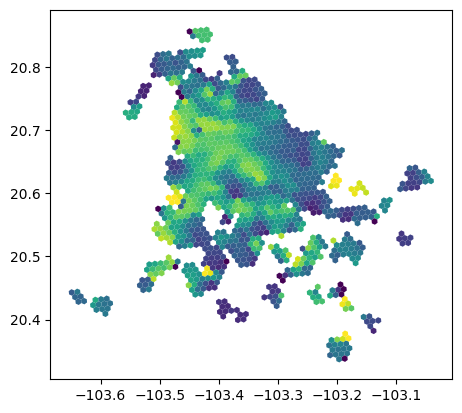

In [24]:
gdf.plot('pct_jobs_>_11')

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

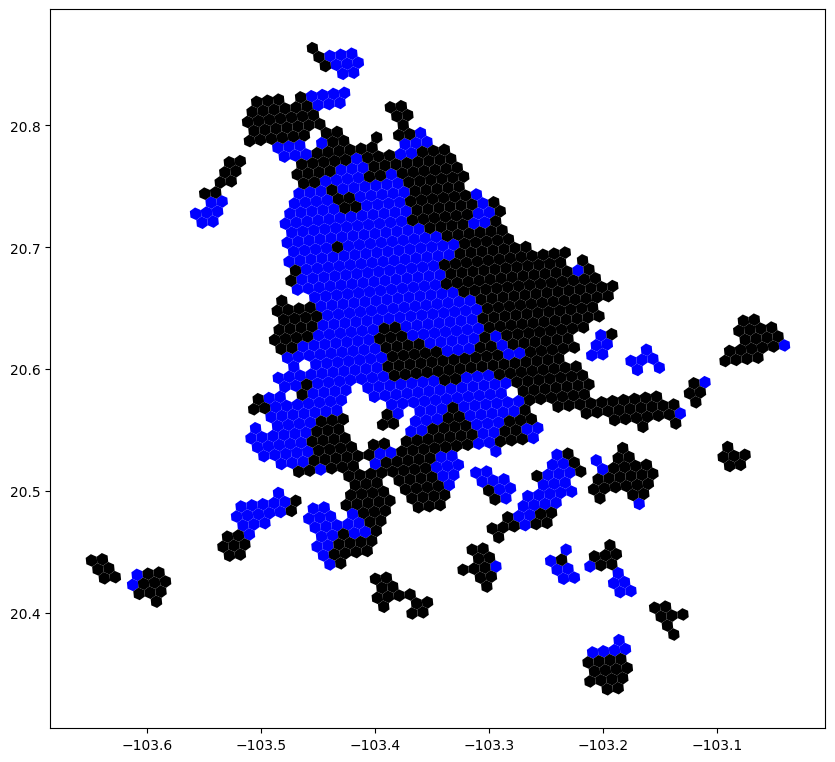

In [25]:
fig,ax = plt.subplots(figsize=(10,10))

idx = gdf['pct_jobs_>_11'] >= gdf['pct_jobs_>_11'].mean()

gdf.loc[idx].plot('pct_jobs_>_11', color='blue', zorder=1, ax=ax)

gdf.loc[~idx].plot('pct_jobs_>_11', color='black', zorder=2, ax=ax)

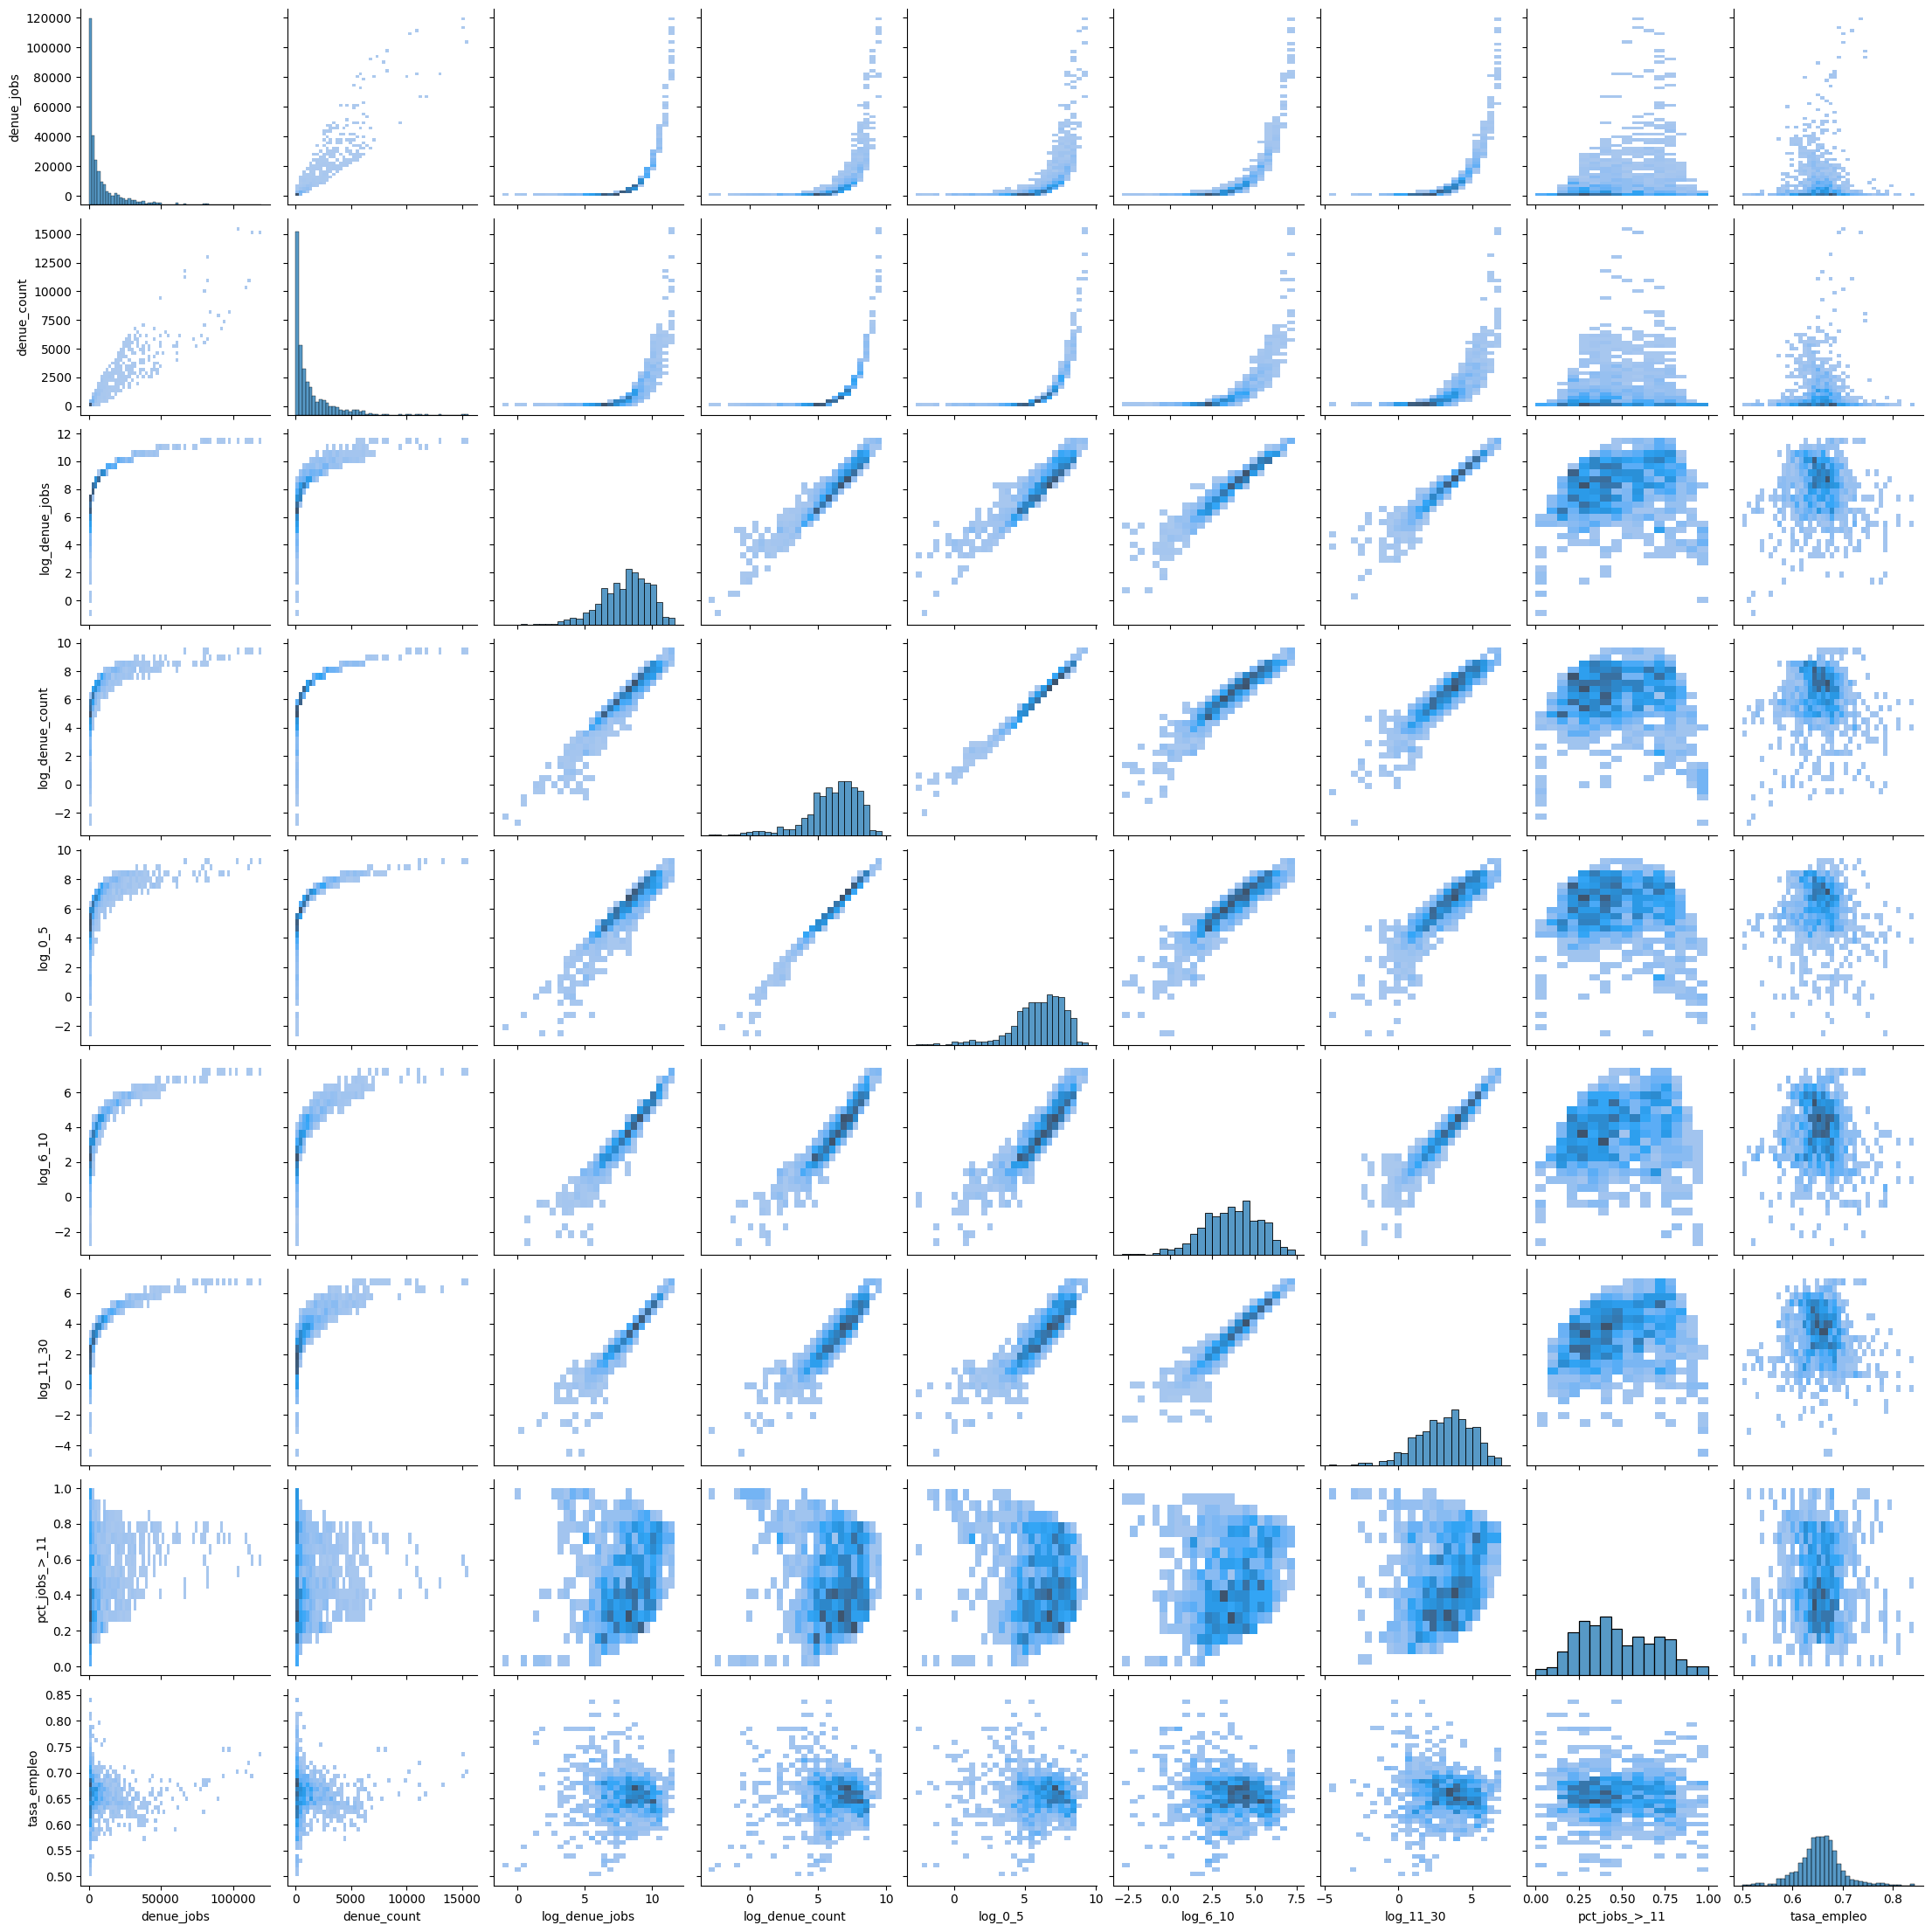

In [26]:
sns.pairplot(gdf[['denue_jobs','denue_count',
                  'log_denue_jobs','log_denue_count',
                  'log_0_5','log_6_10','log_11_30',
                  'pct_jobs_>_11','tasa_empleo']], kind='hist')

## Marginalization vs Job Access

In [28]:
mun_schema = 'metropolis'
mun_folder = 'metro_gdf'

city = 'Guadalajara'

query = f"SELECT * FROM {mun_schema}.{mun_folder} WHERE \"city\" LIKE \'{city}\'"
mun_gdf = aup.gdf_from_query(query, geometry_col='geometry')

print(mun_gdf.shape)
mun_gdf.head(2)

(10, 6)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,city
0,14002,14,002,Acatlán de Juárez,"POLYGON ((-103.65448 20.50346, -103.65200 20.5...",Guadalajara
1,14039,14,039,Guadalajara,"POLYGON ((-103.31164 20.75098, -103.31014 20.7...",Guadalajara


In [29]:
cvegeo_list = list(mun_gdf.loc[mun_gdf.city==city]["CVEGEO"].unique())

In [30]:
# donwload hexagons with pop data
hex_marg = gpd.GeoDataFrame()
hex_folder = 'hex_bins_marg_2020'
hex_schema = 'censo'


# Iterates over municipality codes for each metropolitan area or capital
for cvegeo in cvegeo_list:
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {hex_schema}.{hex_folder} WHERE \"CVEGEO\" LIKE \'{cvegeo}%%\'"
    hex_tmp = aup.gdf_from_query(query, geometry_col='geometry')
    hex_marg = pd.concat([hex_marg, hex_tmp],
    ignore_index = True, axis = 0)
print(hex_marg.shape)
hex_marg.head(2)

(1163, 17)


,geometry,hex_id_8,CVEGEO,pobtot,p6a14nae,sbasc,psdss,ovsde,ovsee,ovsae,ovpt,ovsref,ovsint,ovscel,ovhac,im_2020,imn_2020
0,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",8849abc9ebfffff,14002,273.168550,0.474944,2.828432,1.787101,0.1098,0.008903,0.115735,0.029676,0.697379,4.282201,0.593514,2.756871,120.556725,0.941744
1,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",8849abc9e3fffff,14002,89.333336,1.282051,7.092198,7.960199,0.0000,0.000000,0.621891,0.000000,1.492537,15.049751,0.373134,8.333333,122.339516,0.955670


In [31]:
hex_job_marg = gdf.merge(hex_marg[['hex_id_8','imn_2020']], on='hex_id_8')

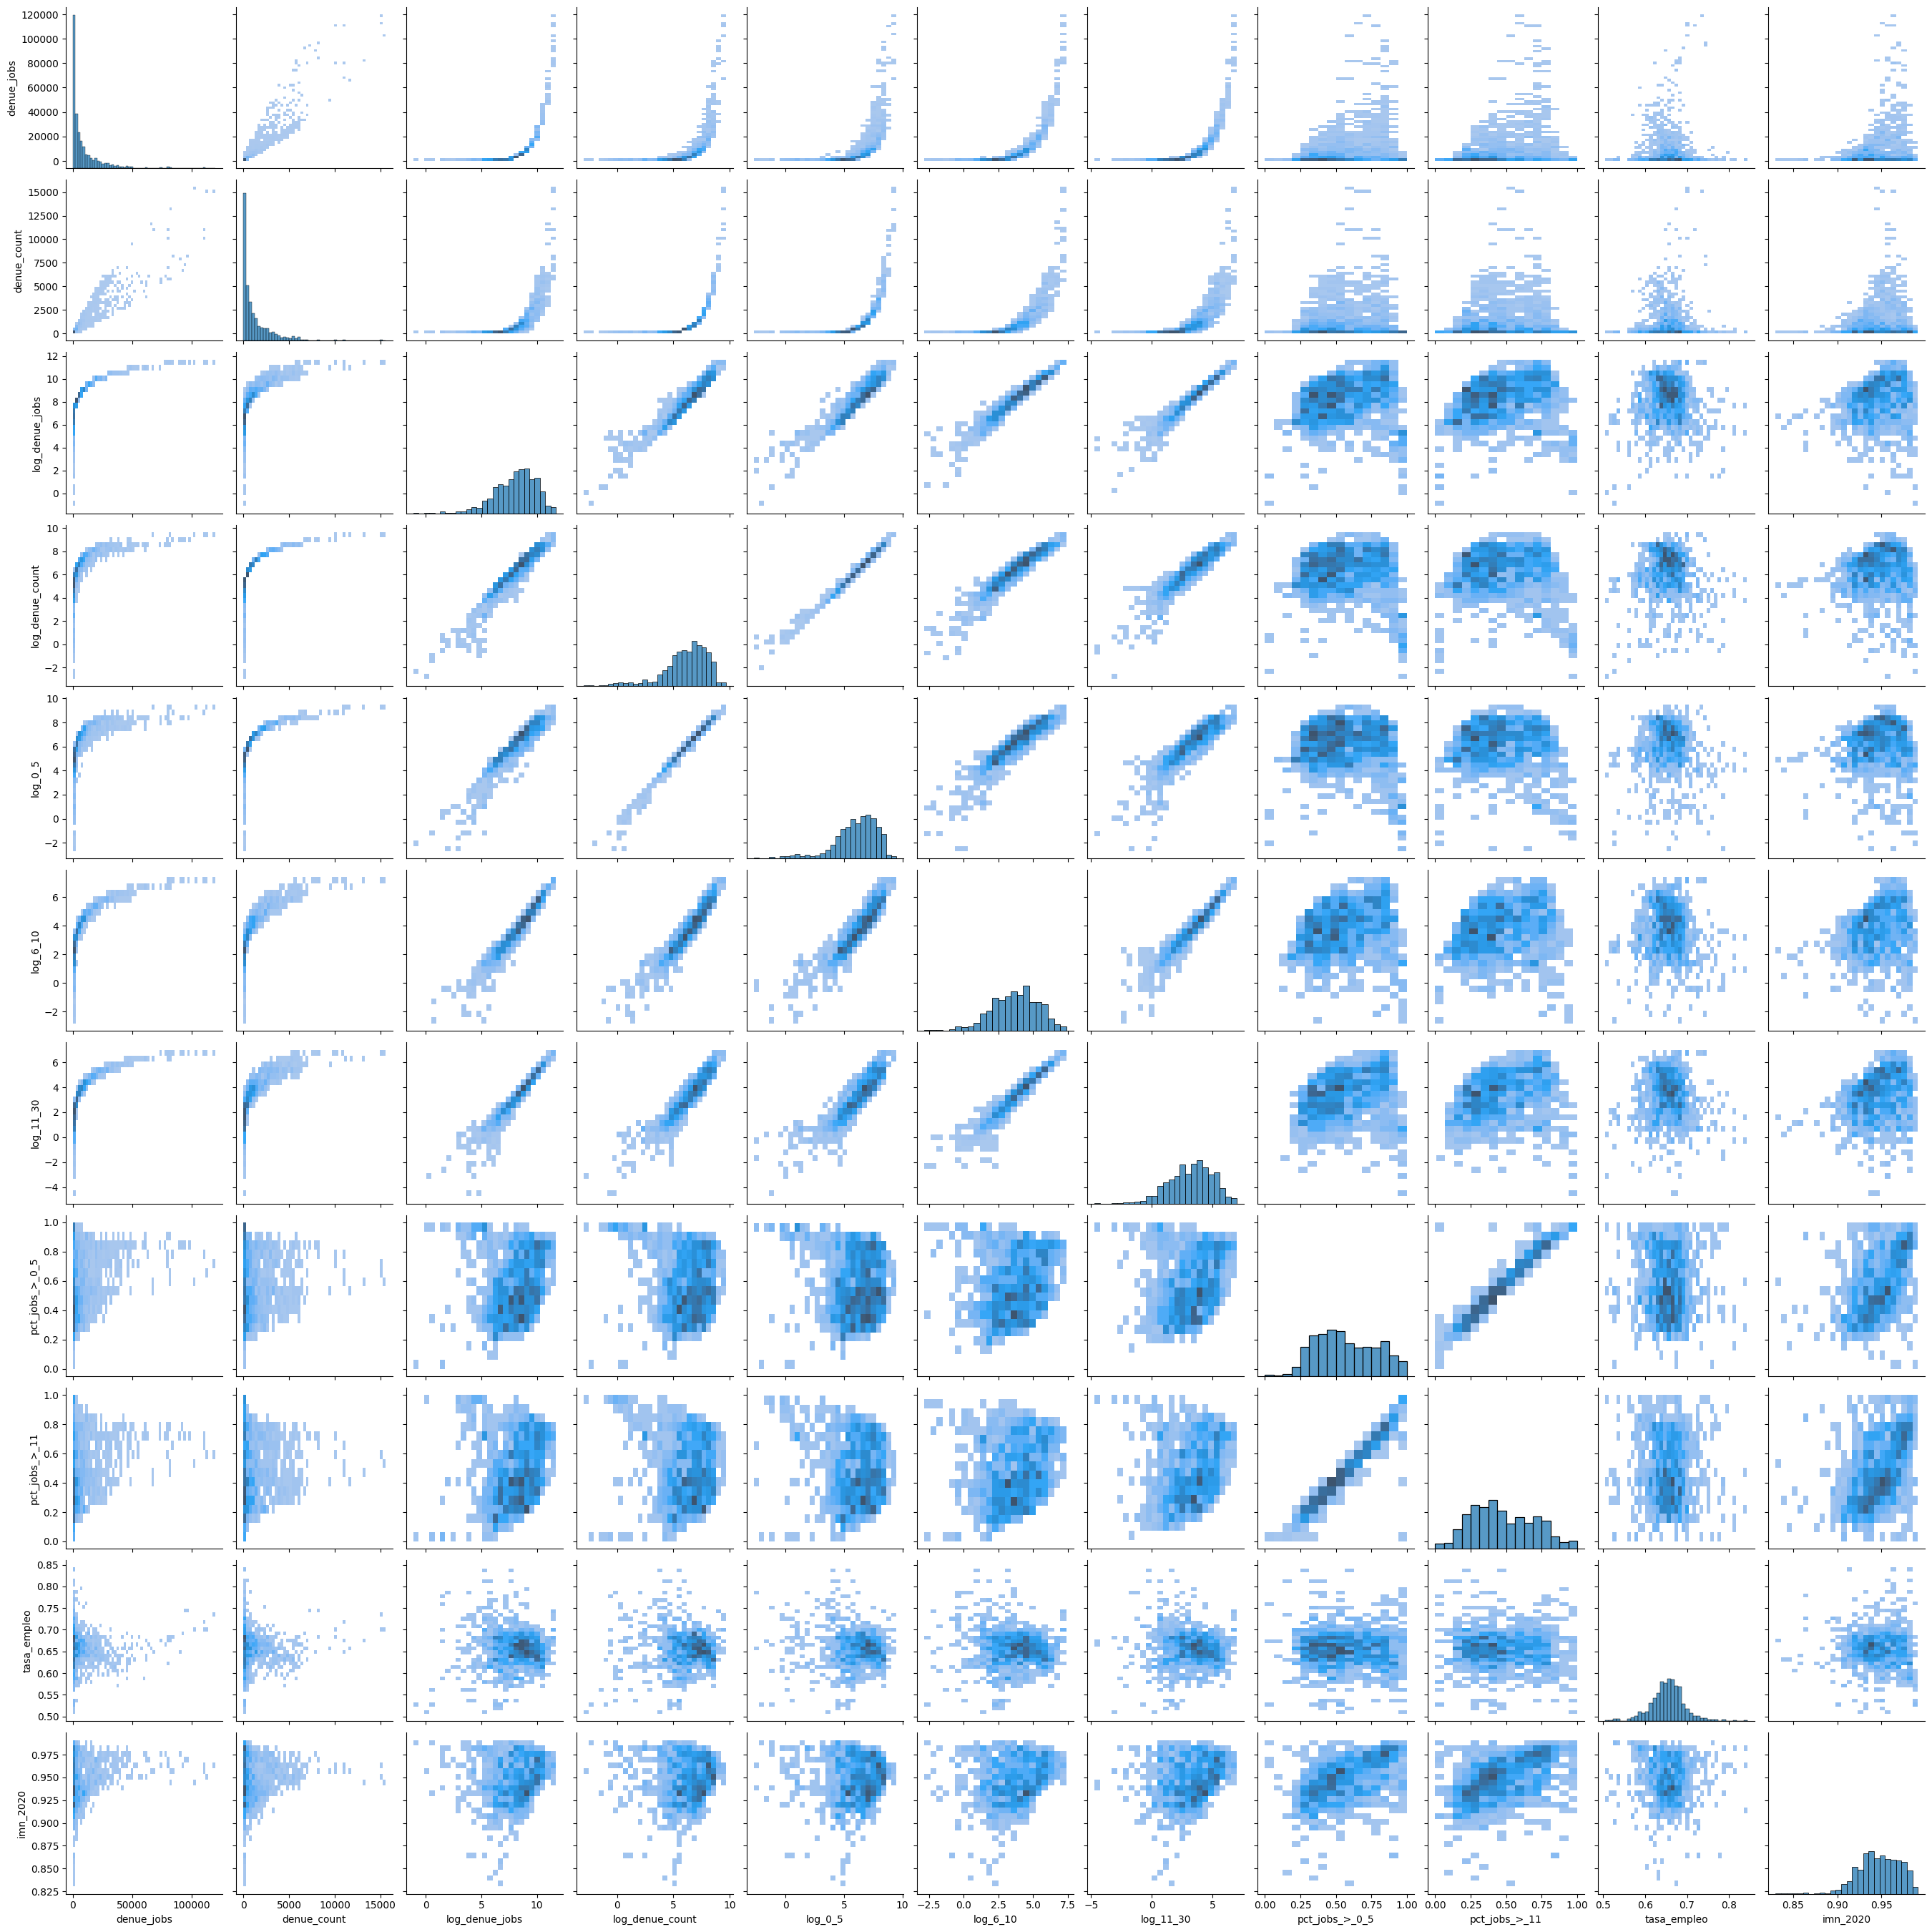

In [32]:
sns.pairplot(hex_job_marg[['denue_jobs','denue_count',
                  'log_denue_jobs','log_denue_count',
                  'log_0_5','log_6_10','log_11_30','pct_jobs_>_0_5',
                  'pct_jobs_>_11','tasa_empleo', 'imn_2020']], kind='hist')

In [33]:
hex_job_marg['Grado_Marg'] = np.nan
hex_job_marg.loc[hex_job_marg.imn_2020>=0.966338 , 'Grado_Marg'] = 'Muy bajo'
hex_job_marg.loc[(hex_job_marg.imn_2020>=0.946436 )&
             (hex_job_marg.imn_2020<0.966338), 'Grado_Marg'] = 'Bajo'
hex_job_marg.loc[(hex_job_marg.imn_2020>=0.926536)&
             (hex_job_marg.imn_2020<0.946436), 'Grado_Marg'] = 'Medio'
hex_job_marg.loc[(hex_job_marg.imn_2020>=0.8999)&
             (hex_job_marg.imn_2020<0.926536), 'Grado_Marg'] = 'Alto'
hex_job_marg.loc[hex_job_marg.imn_2020 < 0.8999, 'Grado_Marg'] = 'Muy alto'

In [34]:
from pandas.api.types import CategoricalDtype


In [35]:
#categorical data
cat_list = ['Muy bajo','Bajo','Medio','Alto', 'Muy alto']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_job_marg['Grado_Marg'] = hex_job_marg['Grado_Marg'].astype(cat_size_order)
hex_job_marg = hex_job_marg.sort_values('Grado_Marg')

Text(0, 0.5, 'Tasa de empleo')

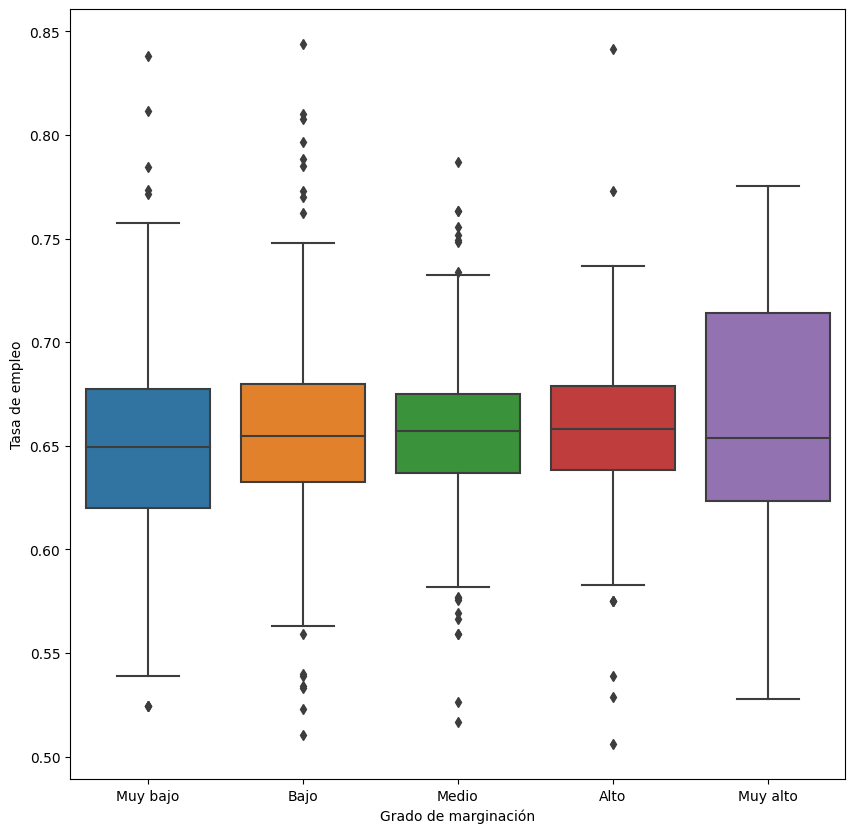

In [36]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_job_marg.Grado_Marg) , y=np.array(hex_job_marg.tasa_empleo), ax=ax)

plt.xlabel('Grado de marginación')
plt.ylabel('Tasa de empleo')

In [37]:
column_y = 'pct_jobs_>_11'
idx = hex_job_marg[column_y].isna()
hex_corr = hex_job_marg.loc[~idx]
x = np.array(hex_corr.imn_2020).reshape((1,-1))
y = np.array(hex_corr[column_y]).reshape((1,-1))
np.corrcoef(x, y)

array([[1.        , 0.42547159],
       [0.42547159, 1.        ]])

Text(0, 0.5, 'Tasa de empleo')

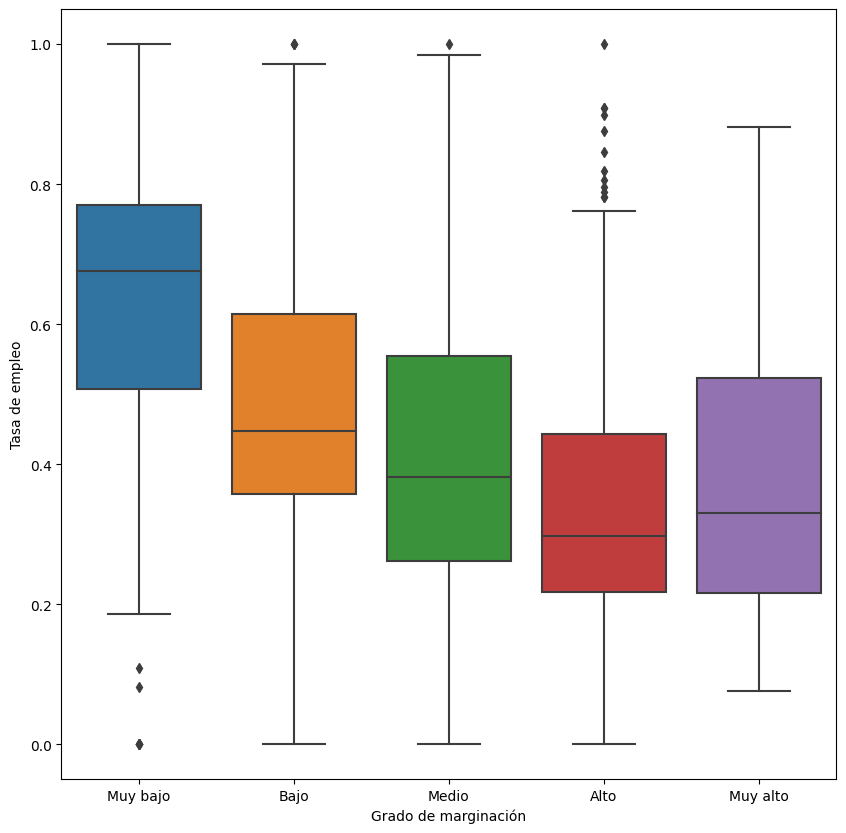

In [38]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_job_marg.Grado_Marg) , y=np.array(hex_job_marg['pct_jobs_>_11']), ax=ax)

plt.xlabel('Grado de marginación')
plt.ylabel('Tasa de empleo')

Text(0, 0.5, 'Tasa de empleo')

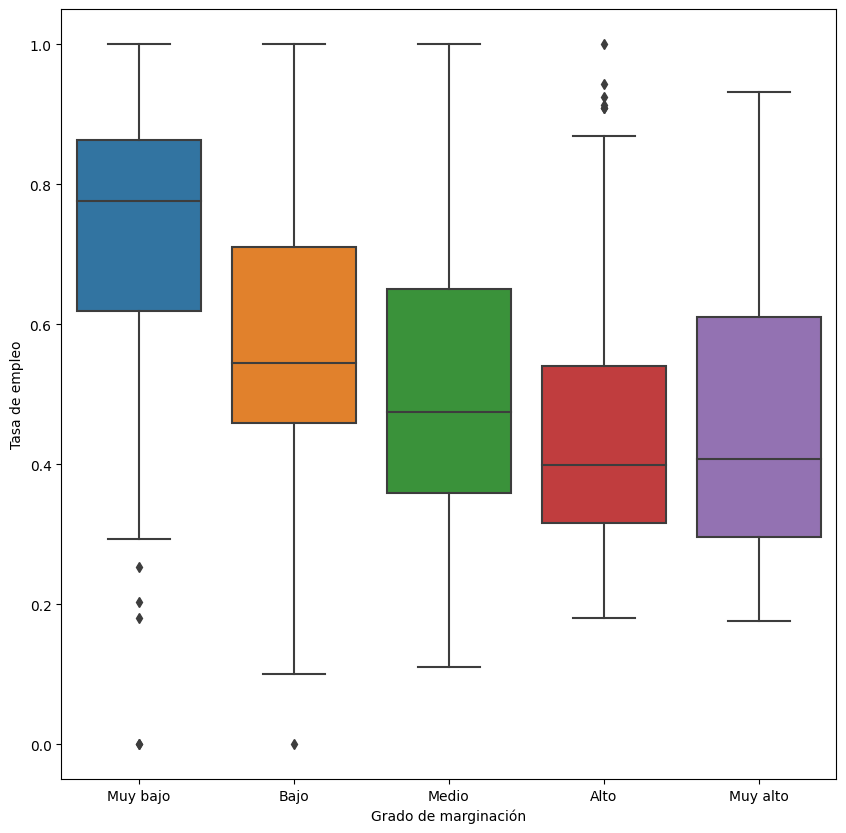

In [39]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_job_marg.Grado_Marg) , y=np.array(hex_job_marg['pct_jobs_>_0_5']), ax=ax)

plt.xlabel('Grado de marginación')
plt.ylabel('Tasa de empleo')

Text(0, 0.5, 'Tasa de empleo')

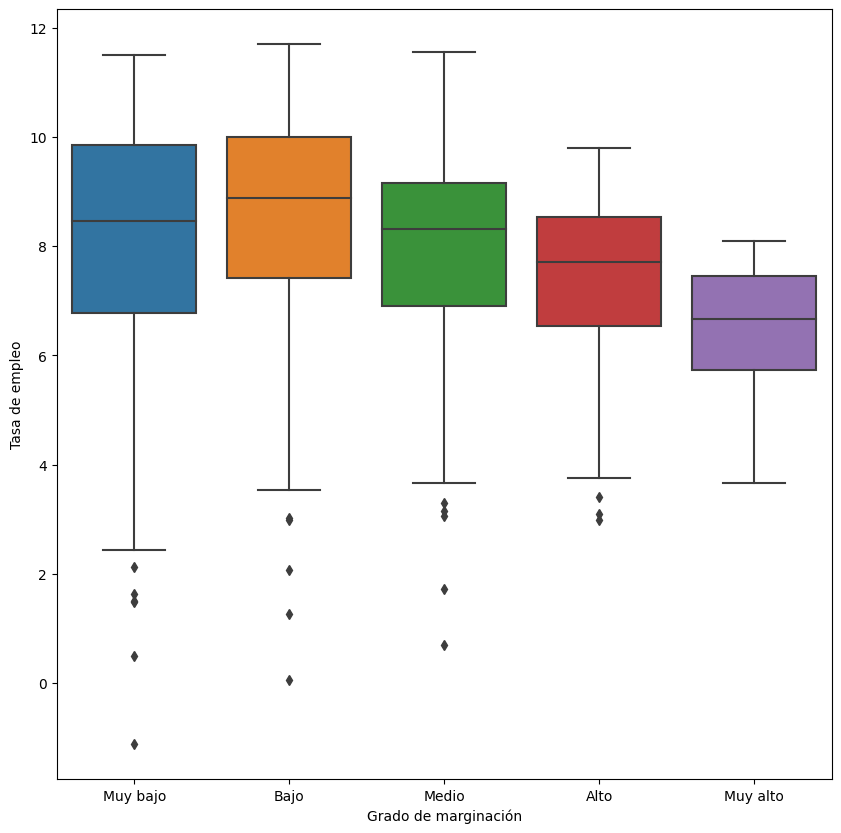

In [44]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_job_marg.Grado_Marg) , y=np.array(hex_job_marg['log_denue_jobs']), ax=ax)

plt.xlabel('Grado de marginación')
plt.ylabel('Tasa de empleo')

Text(0, 0.5, 'Tasa de empleo')

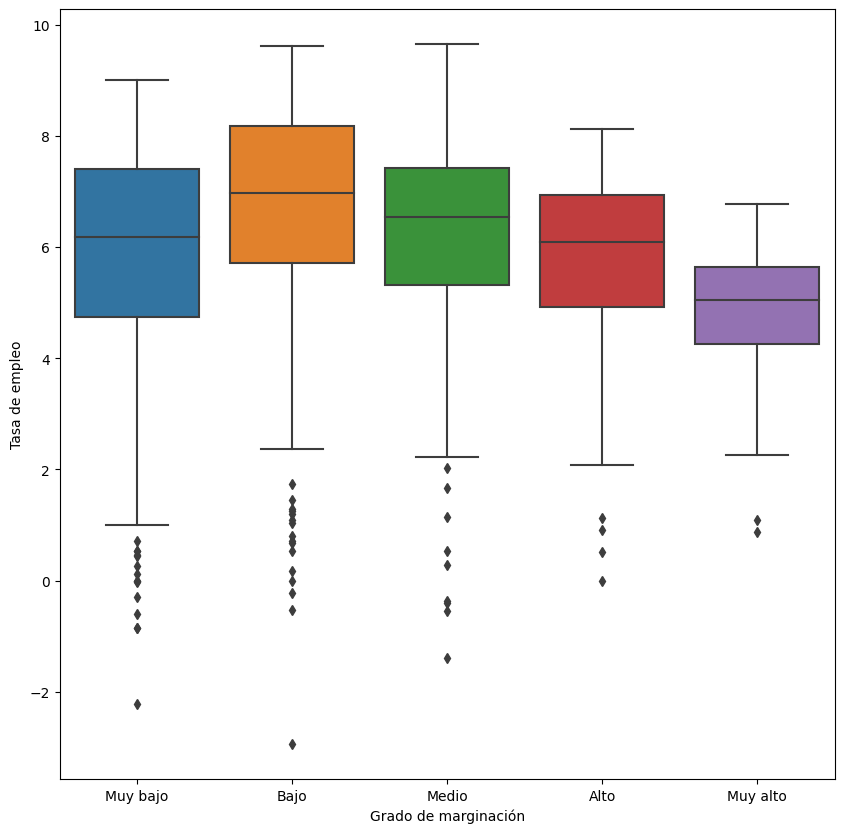

In [42]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_job_marg.Grado_Marg) , y=np.array(hex_job_marg['log_denue_count']), ax=ax)

plt.xlabel('Grado de marginación')
plt.ylabel('Tasa de empleo')